In [205]:
library(ggplot2)
options(warn = -1)

# Exploration: Empirical CDF, Inverse Transform Sampling and the Newsvendor Inventory Model

Suppose we have at our disposal a random sample of observations X with an unknown distribution.

Question 1: Can we obtain a cumulative distribution function based on this random sample?

Question 2: Can we obtain the inverted CDF of such a cdf in question 1 that we can use to obtain a new random sample with the same unknown distribution (inverse-transform sampling)?


For this simple R Implementation I use X ~ Exp(λ=0.5) with 1000 samples but in fact we can use any random sample we want to answer both of the questions above. The cdf of the exponential distribution is easily invertible and hence it will be easy to evaluate results that follow.



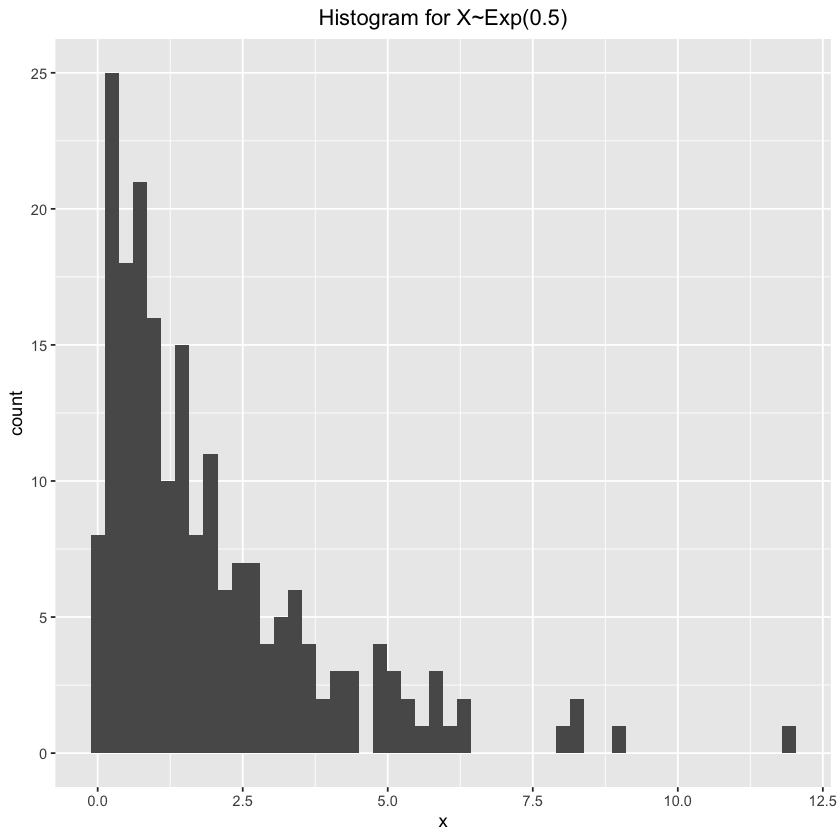

In [206]:
N=200
x<-rexp(rate=0.5,n=N) # generate random sample of 200 data points from the exponential distribution
#next line produces a simple histogram of the sample generated
ggplot(data.frame(x),aes(x=x))+geom_histogram(bins=50)+ggtitle("Histogram for X~Exp(0.5)")+theme(plot.title = element_text(hjust = 0.5))

**Empirical CDF is Defined**:
<br>

F(x) = $\sum_{i=1}^{n}I_{x>i}$ / n

where n = size of sample 

(definition taken from Larry Wasserman All of Statistics page 97)

<br>

**Inverse Empirical CDF**

$F^{−1} : [0, 1] → \mathbf{R}$

$F^{-1}(u)$ = min$\{x:u\in\mathbb[0,1]\text{ and }F(x) \ge u\} $

note the added complexity that unlike our gamma distribution cdf, the empirical cdf may not be strictly monotone and hence the minimum (or infimum) are used to address this. (cdf's must be weakly monotone and right continuous)


In [207]:
F <- function (m){
    s=0
    for (i in 1:length(x)){
        if (x[i]<m){s=s+1}}
    return (s/N)}
F_inv <- function(u,F){
    s<-c()
    for (i in seq(from = 0, to = 15, length.out = 300)  ){
        if (F(i)>=u){
            s<-c(s,i)}   } 
    if (length(s) !=0){ 
        return (min(s))} 
    else {return (15)}   }

In [208]:
y<-c()
for (i in 1:length(x)){y = c(y,F(x[i]))}
u = seq(from = 0, to = 1, length.out = N)
y2<- c()
for (i in 1:length(u)){y2 = c(y2,F_inv(u[i],F))}

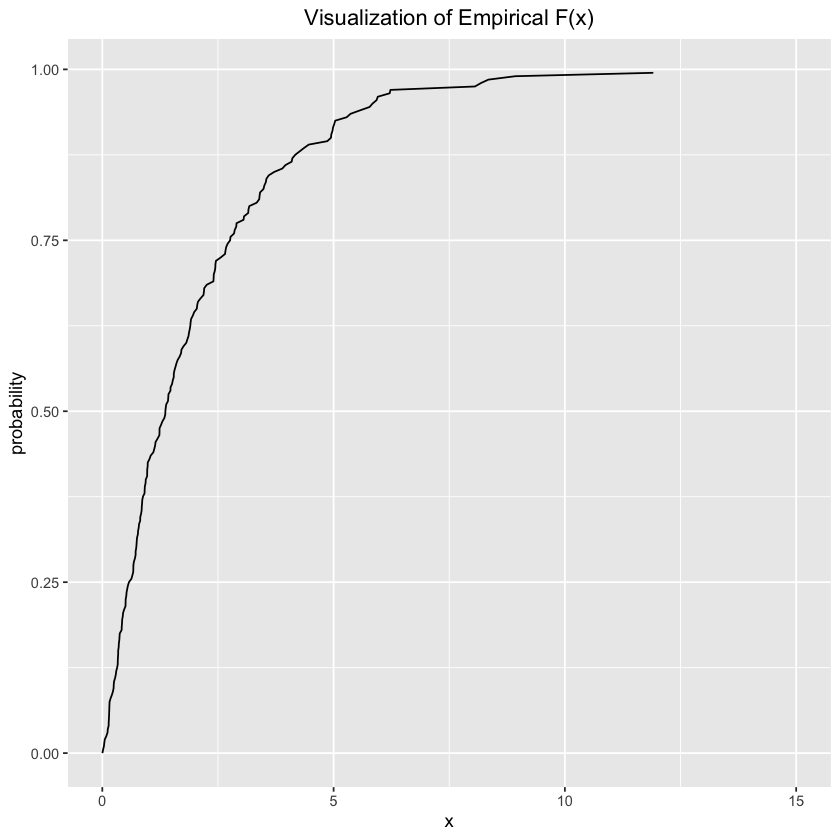

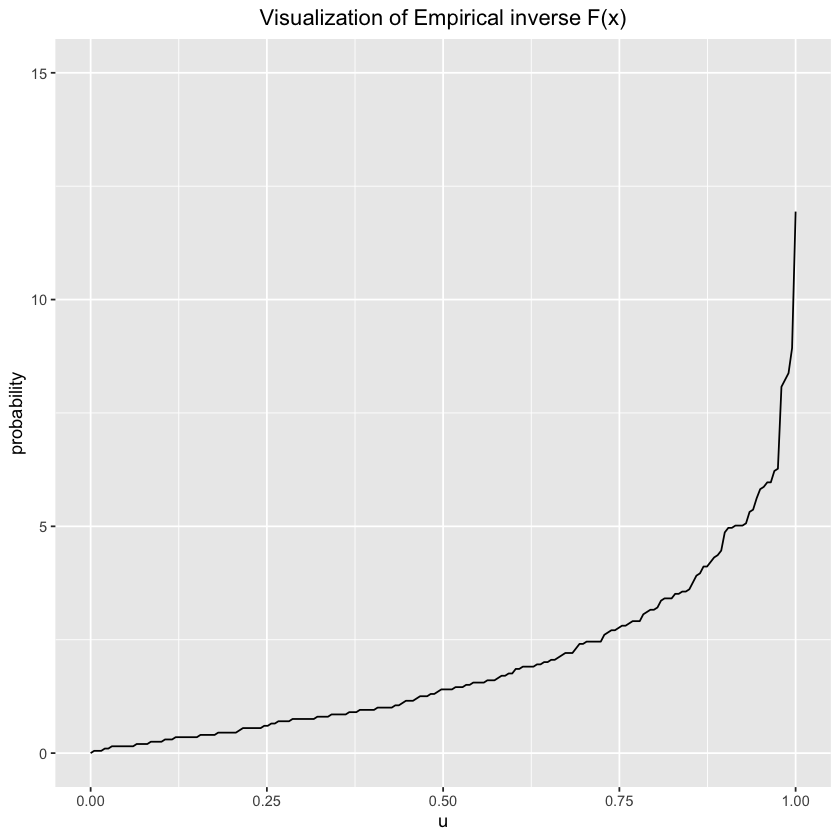

In [209]:
ggplot(data.frame(x,y),aes(x=x,y=y))+geom_line()+
xlim(0,15)+ggtitle("Visualization of Empirical F(x)")+
ylab('probability')+theme(plot.title = element_text(hjust = 0.5))
ggplot(data.frame(u,y2),aes(x=u,y=y2))+geom_line()+
ylim(0,15)+ggtitle("Visualization of Empirical inverse F(x)")+
ylab('probability')+
theme(plot.title = element_text(hjust = 0.5))

Sanity Check!! But how do the above correspond to the actual Exp(λ=0.5) cdf that we know X came from?

Recall the Exponential distribution is characterized by the cdf.

<br>

$ F_{X}(x;\lambda) = \begin{cases}
\  1-e^{ - \lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

<br>


In [210]:
cdf <- function(x) {1-exp(-0.5*x)}
X<-seq(0,5,length.out=N)
emp_cdf_y=c()
for (i in X){emp_cdf_y<-c(emp_cdf_y,F(i))}
true_y=c()
for (i in X){true_y<-c(true_y,cdf(i))}

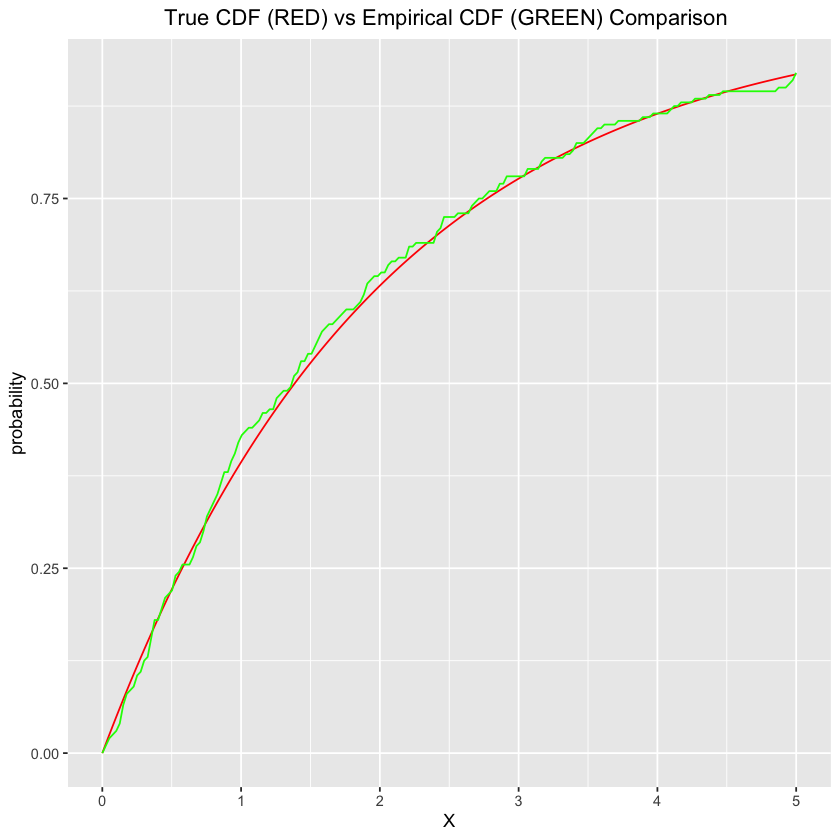

In [211]:
df<-data.frame(X,c(emp_cdf_y,true_y))
ggplot()+geom_line(aes(x=X,y=true_y),color="red")+
geom_line(aes(x=X,y=emp_cdf_y),color="green")+
ggtitle('True CDF (RED) vs Empirical CDF (GREEN) Comparison ')+
theme(plot.title = element_text(hjust = 0.5))+ylab('probability')

from the above we can observe that even with 1000 data points in this case the empirical cdf that we have obtained very closely matches the true cdf 

<br>

but what about the inverse cdf? how does our inverse cdf compare to the true inverse cdf given that we know the distribution where the random sample came from?

<br>

for $x\ge 0$ we can rearrange the cdf definition to obtain: $x = \frac{ln(1-F(x)}{-λ}$ which in our case will become $x = F^{-1}(u)=-2*ln(1-u)$ 

<br>

We can generate a sample of observations $~ Uniform(0,1)$ via inverse transform sampling using $F^{-1}(u)$. 

<br>

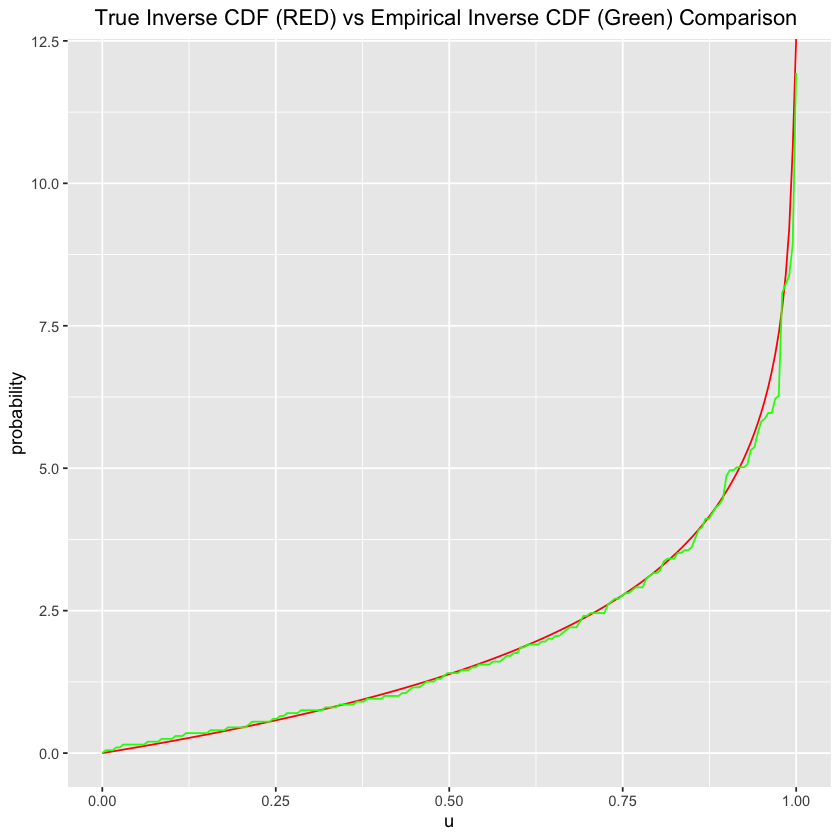

In [212]:
true_F_inv<-function(u){-2*log(1-u)}
true=c()
for (i in u){true<-c(true,true_F_inv(i))}
emp=c()
for (i in u){emp<-c(emp,F_inv(i,F))}
df<-data.frame(u,c(emp,true))
ggplot()+geom_line(aes(x=u,y=true),color="red")+
geom_line(aes(x=u,y=emp),color="green")+
ggtitle('True Inverse CDF (RED) vs Empirical Inverse CDF (Green) Comparison ')+
theme(plot.title = element_text(hjust = 0.5))+ylab('probability')